**Lab Parteners: DJ (Han), Kayla, Mason**

# 🧪LAB: Partial Least Squares Regression

In this lab, you will explore **Partial Least Squares (PLS) Regression**, a powerful technique for modeling relationships between high-dimensional, collinear predictors and a continuous outcome. You will begin with a **group discussion** after reading about the method. Next, you will become familiar with its implementation in `scikit-learn` by **recreating and reflecting on one of their tutorials**. Finally, you will apply PLS to a **real-world chemoinformatics dataset** that includes binary molecular fingerprints as predictors and a continuous permeability outcome for a set of chemical compounds.

PLS is particularly useful when the number of predictors is large and highly correlated, making traditional regression methods unstable or ineffective. You will also compare PLS with an alternative predictive model that also involves a dimensionality reduction approac **Penalized Principal Component Regression (PCR)**.

---

**Collaboration Note**: This assignment is designed to support collaborative work. We encourage you to divide tasks among group members so that everyone can contribute meaningfully. Many components of the assignment can be approached in parallel or split logically across team members. Good coordination and thoughtful integration of your work will lead to a stronger final result.

---

In total, this lab assignment will be worth **100 points**.

## 1. Reading & Group Discussion (10 Points)

Carefully read **Sections 6.2 and 6.3** of the *An Introduction to Statistical Learning* book (Reference B). The first section introduces Principal Component Regression (PCR), which we already covered in a previous class. The second section, instead, introduces Partial Least Squares (PLS).

After reviewing the content, discuss with your group and then answer the following questions:

a. What is the key difference between Principal Component Regression (PCR) and Partial Least Squares (PLS) (Kayla)

* PCR leverages PCA by possibly running sklearn.decomposition package. PCA utilizes the X or predictor matrix to find the best "direction" for the first principle component. However, Partial Least Squares uses both the X predictor matrix and the y predicted vector in the calculated covariance to find the best "direction". In short, PCR maximizes the variance of the X predictor matrix, and PLS maximizes the covariance between the X and predicted y.

b. Why might PCR fail to find directions that are useful for predicting the response `Y`? (DJ)

* In general, PCR might fail to find directions that are useful in prediction because PCR typically looks for maximizing variance of the predictor matrix X. It could be the case that the direction of maximized variance isn't the direction that is most correlated with the predictor value `Y` if we focus on just maximizing variance as the goa. In addition, PCR may fail to find directions that are useful for predicting the response variable `Y` if the features are not properly standardized. Standardization ensures that each feature contributes equally to the computation of variance. PCR constructs principal components that capture the most variance in the predictors X; however, if the most important predictor for `Y` has low variance, PCR may overlook it — leading to poor predictive performance.

c. In PLS, how is the first direction `Z₁` computed? (Kayla)

* To find the first direction $Z_1$, the weights of the predictive features in X would be calculated to maximize the covariance with the predicted `Y`. These weights would reflect how "useful" (higher weights) or "not useful" (smaller weights) the specified features are to maximizing the covariance. The sum of (the weights (phi) multiplied by their respective feature in X) and a possible added intercept value calculates $Z_1$.

d. What are some similarities and differences between PLS and penalized regression? (DJ)

* Partial least squares regression and penalized regression are both useful ways to deal with collinearity and highly-dimensional data, especially when there are more features than observations. Both options can reduce MSE and improve predictive ability.
* These methods differ because penalized regression methods directly change the coefficients, while PLS can create new variables (called latent variables) based on the covariance between X and Y. PLS reduces dimensionality by projecting the data into a space with fewer dimensions, while penalized regression shrinks the least important features.

## 2. Recreate, Explain, Experiment & Reflect (35 points)

Follow this tutorial on Partial Least Squares (PLS) from the official scikit-learn documentation:

📘 [scikit-learn: PLS regression example](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html)

Your goal is to **recreate the PLS portion of the tutorial in this notebook**, and make sure you understand what each part of the code is doing. This will give you the opportunity to build intuition for how PLS works. Be thorough in your answers and interpretations — this will help you when working with real data later in this lab assignment.

### a. Recreate (Mason)
- Load the dataset used in the tutorial. Make sure to create a training/test partition.
- Fit a `PLSRegression` model with 1 component.

In [ ]:
# YOUR CODE HERE (Mason)
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

import necessary packages


In [ ]:
# Create data (Mason)
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

* rng sets a seed for random number generation
* n_samples = 500 ensures that we have 500 data points
* cov defines the covariant matrix. The variance tells us how spread out each variable is and the covariance tells us how two variables move together. The variance of x is 3 and the variance of y is 4.
* With the n_sample that we defined earlier, we created a dataset X of 500 points as a multivariate normal distribution. The points are centered at [0,0].
* Now we apply principal component analysis to the dataset X to find the direction of maximum variance.
* With the target variable y, we project each data point in X onto the second principal component and add some noise to make the data more realistic.


In [ ]:
# Partition Data (Mason)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

We partition our data into training set and testing set.

In [ ]:
# Perform PLS (Mason)
pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

PLSRegression(n_components=1)

This code trains the Partial Least Squares regression model that learns how to predict from our training dataset and find the direction in X that best predicts y.  

In [ ]:
# Evaluate Model Performance (Mason)
r2 = pls.score(X_test, y_test)

# other r2 method:
# y_pred = pls.predict(X_test)
# r2 = r2_score(y_test, y_pred)

print(f"PLS R2 Score: {r2:.3f}")

PLS R2 Score: 0.658


This calculates the R^2 value of our PLS model on the test set to evaluate our model performance.

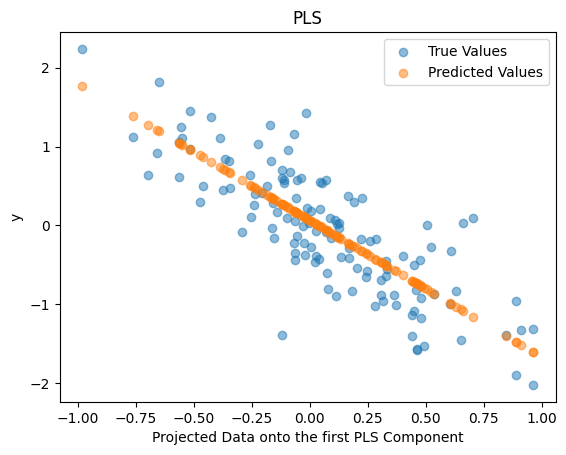

In [ ]:
# Visualize PLS (Mason)
plt.scatter(pls.transform(X_test), y_test, alpha=0.5, label="True Values")
plt.scatter(pls.transform(X_test), pls.predict(X_test), alpha=0.5, label="Predicted Values")
plt.xlabel("Projected Data onto the first PLS Component")
plt.ylabel("y")
plt.title("PLS")
plt.legend()
plt.show()

Here, we are predicting the true vs predicted values of y. y_test is the true values while pls.predict(X_test) is what our model predicted. The visualization shows the relationship between the two.

### b. Explain (DJ)
For **every block of code**, add a markdown cell that explains:

- What is the goal of this step?
- Why is this important in a PLS regression pipeline?
- What does the output mean or tell us?

I have explained each step - all of those steps were important in a PLS regression pipeline as it illustrates the supervised learning process we have learned in ML1. We started with creating data with known relationship, then partitioning our data, and fitting Partial Least Squares regression. Then we evaluated our model using R2 coefficient and the visualization.

The output, in this case, the R2 coefficient (0.658) and the visualization tells us that the model has successfully learned to capture the signal from X to predict y.

### c. Experiment (Kayla)
Make the following changes:
- Change the number of components to **2 components** and fit again the model.
- Plot the **predicted vs. actual** response values on the test set.
- Report **R²** and **Mean Squared Error (MSE)** for your model
- On the test set, create scatter plots showing each component on X against y. (Hint: Use the `transform` method applied to X to get each component). In the title, show the correlation coefficient between both variables. Your first component should correlate more (in magnitude) with the outcome.

In [ ]:
# YOUR CODE HERE (Kayla)

# Perform PLS but with n_components=2 now
pls_2 = PLSRegression(n_components=2)
pls_2.fit(X_train, y_train)

PLSRegression()

Now, we train a PLS regression with 2 components. This allows the model to capture more structure in the data.

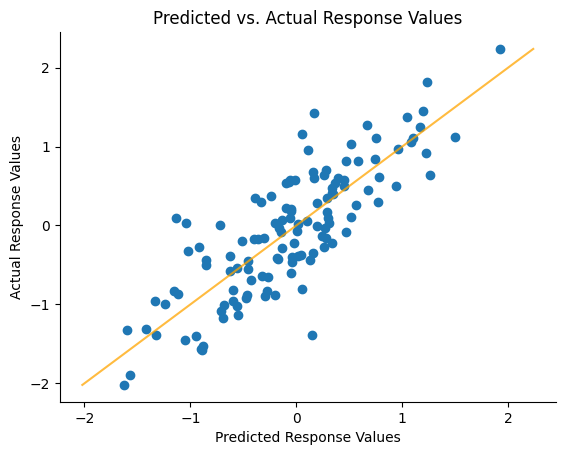

In [ ]:
# plotting predicted resopnse vs actual response values on test set (Kayla)

# apply dim reudction of pls_2 on test set & gaining y prediction set
X_transformed = pls_2.transform(X_test)
y_pred = pls_2.predict(X_test)

# plot prediction by actual values
plt.plot(y_pred, y_test, 'o')

# helpful y=x line
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], '-', color='orange', alpha=0.75)

plt.xlabel('Predicted Response Values')
plt.ylabel('Actual Response Values')
plt.title('Predicted vs. Actual Response Values')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In the visualization, we plot an ideal line where the predicted = actual. If our blue dots are close to the ideal yellow line, it would be a good sign.

In [ ]:
# Evaluate Model Performance for n_components=2 (Kayla)
from sklearn.metrics import r2_score, mean_squared_error

# Reporting r2
r2_2 = r2_score(y_test, y_pred)
print(f"PLS R2 Score for PLS with 2 components: {r2_2:.3f}")

#Reporting MSE
mse_2 = mean_squared_error(y_test, y_pred)
print(f"PLS MSE Score for PLS with 2 components: {mse_2:.3f}")

PLS R2 Score for PLS with 2 components: 0.673
PLS MSE Score for PLS with 2 components: 0.217


Here, we report the r2 and MSE scores for the PLS model trained above with 2 components. They are 0.673 and 0.217 respectively.

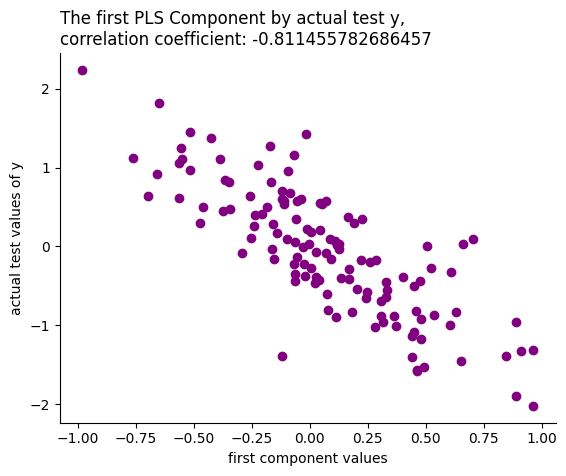

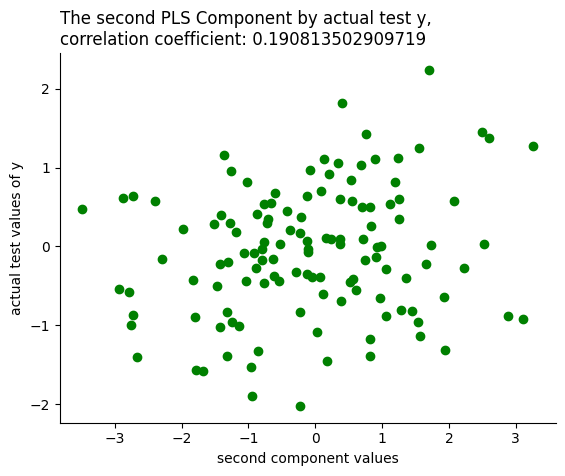

In [ ]:
# Scatter plots of x against y showing each component (Kayla)
# transform done above on X_test -> X_transformed

# First component
plt.scatter(X_transformed[:, 0], y_test, color='purple')

# attaining correlation coefficient with y_test for first component:
# corr_comp1_y = np.corrcoef(X_transformed[:, 0].flatten(), y_test.flatten())[0, 1]
corr_comp1_y = np.corrcoef(X_transformed[:, 0], y_test)[0, 1]

plt.xlabel("first component values")
plt.ylabel("actual test values of y")
plt.title(f"The first PLS Component by actual test y, \ncorrelation coefficient: {corr_comp1_y}", loc="left")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#-----------------------------------
print("\n\n")
#-----------------------------------

# Second component
plt.scatter(X_transformed[:, 1], y_test, color='green')

# correlation coefficient for second component:
# corr_comp2_y = np.corrcoef(X_transformed[:, 1].flatten(), y_test.flatten())[0, 1]
corr_comp2_y = np.corrcoef(X_transformed[:, 1], y_test)[0, 1]

plt.xlabel("second component values")
plt.ylabel("actual test values of y")
plt.title(f"The second PLS Component by actual test y, \ncorrelation coefficient: {corr_comp2_y}", loc="left")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


On the 2 graphs, we first plot the first component values by the actual values of y in the test set. We do the same for the second component in the second plot. It seems the 1st component values are more correlated with the actual y values compared to that of the 2nd component as mentioned in the directions.

### d. Reflect (Mason)
Finally, answer these questions:

- What do the learned PLS components represent in your dataset?
- Did increasing the number of components improve performance?
- What makes PLS different from PCA?

The PLS components represent linear combinations of the X features with the greatest covariance with the Y values. In this case, increasing the number of components improved performance slightly, increasing the $R^2$ score by only 0.2. This small increase suggests that the majority of predictive ability was captured with the first component.

PLS is a distinct method from PCA because it considers the covariance between x and y, not just the features of X that exhibit the greatest amount of variance like in the case of PCA. PLS is a supervised method because it considers the values of y when determining covariance between x and y, while PCA's process makes it an unsupervised method.



## 3. PLS on real data: Molecular Fingerprints and Permeability (50 points)

In this final part of the lab, you will apply PLS Regression to a real-world, high-dimensional dataset from pharmaceutical research.

The goal is to build a predictive model of compound permeability—a key property that determines a molecule’s ability to cross biological membranes such as the intestinal wall or the blood–brain barrier. Permeability is critical in drug development, as compounds that cannot reach their target tissues may ultimately fail despite promising initial results.

You will work with a dataset containing 165 compounds characterized by 1,107 binary molecular fingerprints, which indicate the presence or absence of specific chemical substructures. Your task is to use PLS to predict each compound's permeability and evaluate whether such a model could serve as a computational alternative to expensive, labor-intensive lab assays.

Here the link to the dataset: https://github.com/UVADS/DS-4021/blob/84e85842222820f6d60bfdfd051c6d1556d98479/datasets/lab01_data.csv

### a. Prepare data (DJ)

- Load the dataset.
- Separate the molecular fingerprint variables (`X`) from the permeability values (`y`).
- Split the data into training and test sets (e.g., 70/30 split).

In [ ]:
#Part A (DJ)
import pandas as pd
url = "https://raw.githubusercontent.com/UVADS/DS-4021/84e85842222820f6d60bfdfd051c6d1556d98479/datasets/lab01_data.csv"
dataset = pd.read_csv(url)
print(dataset.head())

y = dataset["permeability"]
X = dataset.drop(columns = ['permeability'])
print("X Shape: ", X.shape, "Y Shape: ", y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

   fingerprint1  fingerprint2  fingerprint3  fingerprint4  fingerprint5  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   fingerprint6  fingerprint7  fingerprint8  fingerprint9  fingerprint10  ...  \
0             1             1             1             0              0  ...   
1             0             1             1             0              0  ...   
2             1             1             1             0              0  ...   
3             0             1             1             0              0  ...   
4             0             1             1             0              0  ...   

   fingerprint1099  fingerprint1100  fingerprint1101  fingerpr

### b. Create a pipeline. (DJ)

Create a pipeline that includes the following:

- A variance thresholding step to remove near-constant binary features, since molecular fingerprints are typically sparse.
(Hint: you may want to check the `feature_selection` module in `scikit-learn`.)
- A standardization step.
- The Partial Least Squares Regression method.

In [ ]:
#Part B (DJ)
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline

vt = VarianceThreshold(threshold = 0.01)
ss = StandardScaler()
pls = PLSRegression(n_components = 5)

steps = [("selector", vt), ("scaler", ss), ("regressor", pls)]

pip = Pipeline(steps)
pip

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.01)),
                ('scaler', StandardScaler()),
                ('regressor', PLSRegression(n_components=5))])

### c. Optimize and train. (DJ)

After you create the pipeline, you should optimize (using cross-validation) and train your pipeline. Your optimization should tune the number of PLS components. After training, report:

- The number of predictors remaining after the variance thresholding step
- The selected number of PLS components
- The cross-validated **R²** on the training set.

In [ ]:
#Part C (DJ)
from sklearn.model_selection import GridSearchCV

param_grid = {"regressor__n_components": list(range(1,16))}
grid = GridSearchCV(pip, param_grid, scoring = "r2", cv = 5)
grid.fit(X_train, y_train)

X_selected = vt.fit_transform(X_train)
print("Number of predictors remaining after variance thresholding:", X_selected.shape[1])

best_n = grid.best_params_["regressor__n_components"]
print("Selected number of PLS components:", best_n)

best_score = grid.best_score_
print("Cross-validated R² on training set: {:.4f}".format(best_score))

Number of predictors remaining after variance thresholding: 710
Selected number of PLS components: 3
Cross-validated R² on training set: 0.3891


Originally, there were 1107 molecular fingerprint features, now there is 710 predictors after variance thresholding. The model found out that 3 components best captured the information needed to predict permeability without overfitting.

### d. Evaluate (Kayla)

- Use the best PLS model to predict permeability on the test set
- Report the test set R²

In [ ]:
#Part D (Kayla)

# best model from above gridCV:
optimized_model = grid.best_estimator_
y_pred_new = optimized_model.predict(X_test)

# r2 score from optimized model
r2_new = r2_score(y_test, y_pred_new)
print(f"PLS R2 Score for optimized model: {r2_new:.3f}")


PLS R2 Score for optimized model: 0.063


### e. Compare. (Kayla)

- Compare with the performance obtained using a penalized principal component regression. You may experiment with Lasso, Ridge or/and ElasticNet. Make sure to encapsulate this model into a pipeline and optimize it as well.

We experimented by performing pipelines for PCA on 1) Lasso, 2) Ridge, and 3) ElasticNet. We then optimized all three Pipelines with GridSearchCV. Using the optimized models for all 3, we then reported teh r2 scores for each model.

Comparing all 3 model r2 scores and that of our PLS score (r2_new from above), one can notice that the Lasso PCA r2 score was the highest (0.20406382984887728), followed by ElasticNet (0.18273312536054653), then by Ridge (0.1813775865186893), and finally our optimized PLS model (0.06341798669831822).

We feel it's expected that ElasticNet would have had an r2 score somewhere between Lasso and Ridge since it's the "combination" of both penalization methods.

In [ ]:
#Part E (Kayla)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# use pipelines for all 3 penalization methods, find optimized models for all 3 pipelines, then compare all 3 r2s with above optimize pls model's

# Steps defined:
ss = StandardScaler()
pca = PCA()

clf = Lasso()
rdg = Ridge()
eln = ElasticNet()

# Lasso:
lasso_inner_cv = KFold(n_splits = 5, random_state=123, shuffle=True)
lasso_param_grid = {'reduction__n_components': list(range(1, 16)), 'regression__alpha': [0.01, 0.1, 0.5, 1, 10]}

lasso_steps = [("scaler", ss), ("reduction", pca), ("regression", clf)]
lasso_pipeline = Pipeline(lasso_steps)

lasso_grid = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=lasso_inner_cv, n_jobs=10, scoring="r2")
lasso_grid.fit(X_train, y_train)
y_pred_lasso = lasso_grid.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)


# Ridge:
ridge_inner_cv = KFold(n_splits = 5, random_state=123, shuffle=True)
ridge_param_grid = {'reduction__n_components': list(range(1, 16)), 'regression__alpha': [0.01, 0.1, 0.5, 1, 10]}

ridge_steps = [("scaler", ss), ("reduction", pca), ("regression", rdg)]
ridge_pipeline = Pipeline(ridge_steps)

ridge_grid = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=ridge_inner_cv, n_jobs=10, scoring="r2")
ridge_grid.fit(X_train, y_train)
y_pred_ridge = ridge_grid.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)


# ElasticNet:
elastic_inner_cv = KFold(n_splits = 5, random_state=123, shuffle=True)
elastic_param_grid = {'reduction__n_components': list(range(1, 16)), 'regression__alpha': [0.01, 0.1, 0.5, 1, 10], 'regression__l1_ratio': [0.2, 0.5, 0.8]}

elastic_steps = [("scaler", ss), ("reduction", pca), ("regression", eln)]
elastic_pipeline = Pipeline(elastic_steps)

elastic_grid = GridSearchCV(elastic_pipeline, elastic_param_grid, cv=elastic_inner_cv, n_jobs=10, scoring="r2")
elastic_grid.fit(X_train, y_train)
y_pred_elastic = elastic_grid.predict(X_test)
r2_elastic = r2_score(y_test, y_pred_elastic)


print(f"lasso PCA r2: {r2_lasso}")
print(f"ridge PCA r2: {r2_ridge}")
print(f"elastic PCA r2: {r2_elastic}")
print(f"optimized PLS model r2: {r2_new}")

lasso PCA r2: 0.20968111860093375
ridge PCA r2: 0.18412425539247956
elastic PCA r2: 0.19146741596492078
optimized PLS model r2: 0.06341798669831822


### f. Reflect (Mason)

Discuss:
- Which model performed best?
- Would you trust any of your models enough to replace the permeability lab assay?
- What would be the trade-offs of doing so?

The Lasso Regression model (L1 Regularization) was the best performing model with an $R^2$ score of 0.19. Considering that this was the best model out of PLS and the 3 penalization regression methods, it is safest to say that none of the models should be trusted to replace the permeability lab assay. An $R^2$ score of 0.19 means that only 19% of the variance of compound permeability is able to be predicted by the fingerprint data. While the reliability of $R^2$ score is dependent on context of the issue at hand, a score less than 0.20 is generally considered to be low and indicative of weak predictive power for a model. If we were to implement this model in order to replace the lab assay, we would be trading off a significant amount of accuracy in predicting permeability. Considering this model would be used for drug development, employing it would likely not lead to favorable outcomes.

## 4. Collaboration Reflection (5 points)

As a group, briefly reflect on the following (max 1–2 short paragraphs):

- How did the group dynamics work throughout the assignment?
- Were there any major disagreements or diverging approaches?
- How did you resolve conflicts or make final modeling decisions?
- What did you learn from each other during this project?

We believe that our group had good chemistry and that this success was from continual communication and planning early as soon as we received group assignments. We were ahead of schedule as we started right after receiving Lab 1 instructions, and held ourselves accountable on doing what we assigned each other. We didn't have many conflicts or diverging approaches in this lab since we split the assignment to have distinct autonomy on separate parts (one person does all of this part, another does the next, etc.). We also trusted what each other did to be the highest level of quality.

Since we worked on distinct parts of the lab, we didn't have any severe conflicts to resolve or final group modeling decisions. Once labs become more complex in the future, we'll most likely need a method to resolve. Our open communication will certainly be a major advantage in resolving these easily, however. In the end, we learned that doing work asynchronously is just as valuable and efficient as working together in person. We also learned that putting our heads together to understand the assignment **before** beginning any code or explanation was key, since understanding helped us get on the same page before immense code or modeling. We'll most likely meet either Monday or Wednesday before/after class the week the assignment is due for finalizations.